<a href="https://colab.research.google.com/github/nhn09/NLP-notebooks/blob/main/UIU_RE_technical_submission_Fariha_Fairoz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

# Basic

In [ ]:
df = pd.read_excel('/content/test-dataset.xlsx')
df.head()

,Unnamed: 0,household_id,total_income,union_name,user_id,profile_name,father_name,mother_name,birthday,age,...,RESULT_STAT_BMI,SUGAR,TAG_NAME,RESULT_STAT_SUGAR,PULSE_RATE,RESULT_STAT_PR,SPO2,RESULT_STAT_SPO2,MUAC,RESULT_STAT_MUAC
0,1,241175,Lower class,KOLA,988794,মো: সাগরহোসেন,0.0,0.0,2001-11-05 18:00:00,19,...,NaN,NaN,NaN,NaN,96.0,Normal,97.0,Normal,NaN,NaN
1,2,241176,Lower class,KOLA,988796,মোছা:তামান্না,0.0,0.0,2000-06-18 18:00:00,20,...,NaN,NaN,NaN,NaN,89.0,Normal,NaN,NaN,NaN,NaN
2,3,241179,Lower class,KOLA,988802,শুকুরুচন্দ্র,0.0,0.0,1978-06-04 18:00:00,42,...,NaN,NaN,NaN,NaN,69.0,Normal,NaN,NaN,NaN,NaN
3,4,241180,Lower class,KOLA,988807,দিপালীরাণী,0.0,0.0,1956-02-02 18:00:00,64,...,NaN,8.72,Random,Normal,85.0,Normal,NaN,NaN,NaN,NaN
4,5,241181,Lower class,KOLA,988809,বুলবুলি,0.0,0.0,1996-12-25 18:00:00,23,...,NaN,NaN,NaN,NaN,101.0,High,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  29999 non-null  int64  
 1   household_id                29999 non-null  int64  
 2   total_income                29999 non-null  object 
 3   union_name                  29999 non-null  object 
 4   user_id                     29999 non-null  int64  
 5   profile_name                29999 non-null  object 
 6   father_name                 25561 non-null  object 
 7   mother_name                 25547 non-null  object 
 8   birthday                    29999 non-null  object 
 9   age                         29999 non-null  int64  
 10  gender                      29999 non-null  object 
 11  is_poor                     29999 non-null  int64  
 12  is_freedom_fighter          29999 non-null  int64  
 13  had_stroke                  299

From initial observation, it is visible that parents' name and profile_name, father_name,mother_name has clearly no impact on the outcome.

In [ ]:
columns_to_drop = ['profile_name','father_name','mother_name','Unnamed: 0']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.isnull().sum()

household_id                      0
total_income                      0
union_name                        0
user_id                           0
birthday                          0
age                               0
gender                            0
is_poor                           0
is_freedom_fighter                0
had_stroke                        0
has_cardiovascular_disease        0
disabilities_name                 0
diabetic                          0
profile_hypertensive              0
SYSTOLIC                       2399
DIASTOLIC                      2399
RESULT_STAT_BP                 2399
HEIGHT                        28871
WEIGHT                        28871
BMI                           28871
RESULT_STAT_BMI               28871
SUGAR                         28416
TAG_NAME                      28416
RESULT_STAT_SUGAR             28416
PULSE_RATE                     2544
RESULT_STAT_PR                 2544
SPO2                          25654
RESULT_STAT_SPO2            

Some columns have extremely high number of missing data. Though they are very important.

In [ ]:
threshold = 0.95  # 95% threshold
missing_percentage = df.isnull().mean()
columns_missingdata_high = missing_percentage[missing_percentage > threshold].index
print(columns_missingdata_high)

Index(['HEIGHT', 'WEIGHT', 'BMI', 'RESULT_STAT_BMI', 'MUAC',
       'RESULT_STAT_MUAC'],
      dtype='object')


more than 85% data is missing. For column with >=90% missing data, imputation might not be the best approach, as it introduces a significant amount of uncertainty and potential bias in the imputed values. Without more collection of data, there is no reliable way to use those features.

In [ ]:
threshold = 0.9  # 95% threshold
missing_percentage = df.isnull().mean()
columns_missingdata_high = missing_percentage[missing_percentage > threshold].index
print(columns_missingdata_high)

Index(['SUGAR', 'TAG_NAME', 'RESULT_STAT_SUGAR'], dtype='object')


In [ ]:
threshold = 0.85  # 95% threshold
missing_percentage = df.isnull().mean()
columns_missingdata_high = missing_percentage[missing_percentage > threshold].index
print(columns_missingdata_high)

Index(['SPO2', 'RESULT_STAT_SPO2'], dtype='object')


In [ ]:
df.drop(columns=columns_missingdata_high,inplace=True)

In [ ]:
df.drop(columns=columns_missingdata_high,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   household_id                29999 non-null  int64  
 1   total_income                29999 non-null  object 
 2   union_name                  29999 non-null  object 
 3   user_id                     29999 non-null  int64  
 4   birthday                    29999 non-null  object 
 5   age                         29999 non-null  int64  
 6   gender                      29999 non-null  object 
 7   is_poor                     29999 non-null  int64  
 8   is_freedom_fighter          29999 non-null  int64  
 9   had_stroke                  29999 non-null  int64  
 10  has_cardiovascular_disease  29999 non-null  int64  
 11  disabilities_name           29999 non-null  object 
 12  diabetic                    29999 non-null  bool   
 13  profile_hypertensive        299

# Data imputation for other columns with less number of missing data

In [ ]:
threshold = 0.5
missing_percentage = df.isnull().mean()
columns_missingdata = missing_percentage[(missing_percentage > 0) & (missing_percentage < threshold)].index
print(columns_missingdata)

Index(['SYSTOLIC', 'DIASTOLIC', 'RESULT_STAT_BP', 'PULSE_RATE',
       'RESULT_STAT_PR'],
      dtype='object')


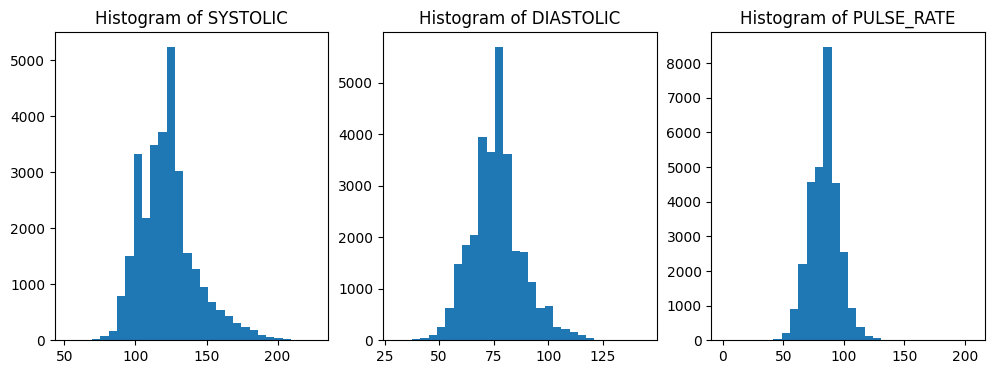

In [ ]:
plt.figure(figsize=(12, 4))


feature_data = df['SYSTOLIC']
plt.subplot(1, 3, 1)
plt.hist(feature_data, bins=30)
plt.title('Histogram of SYSTOLIC')

feature_data = df['DIASTOLIC']
plt.subplot(1, 3, 2)
plt.hist(feature_data, bins=30)
plt.title('Histogram of DIASTOLIC')

# feature_data = df['RESULT_STAT_BP']
# plt.subplot(1, 5,3)
# plt.hist(feature_data, bins=30)
# plt.title('Histogram of Feature')

feature_data = df['PULSE_RATE']
plt.subplot(1,3,3)
plt.hist(feature_data, bins=30)
plt.title('Histogram of PULSE_RATE')

# feature_data = df['RESULT_STAT_PR']
# plt.subplot(1, 5,5)
# plt.hist(feature_data, bins=30)
# plt.title('Histogram of Feature')


plt.show()


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['RESULT_STAT_PR'] = imputer.fit_transform(df[['RESULT_STAT_PR']])
df['RESULT_STAT_BP'] = imputer.fit_transform(df[['RESULT_STAT_BP']])


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['SYSTOLIC'] = imputer.fit_transform(df[['SYSTOLIC']])
df['DIASTOLIC'] = imputer.fit_transform(df[['DIASTOLIC']])
df['PULSE_RATE'] = imputer.fit_transform(df[['PULSE_RATE']])

In [ ]:
# from fancyimpute import KNN

# for column in columns_missingdata:
#   knn_imputer = KNN(k=5)
#   df[column] = knn_imputer.fit_transform(df[[column]])  could not do it as session crashed


**Chi square test for categorical values**




Let the target variable is - has_cardiovascular_disease . We will do chi square test for all the categorical fields to understand significance of that specific feature. The categorical features are - gender, is_poor,is_freedom_fighter,had_stroke,diabetic,profile_hypertensive,RESULT_STAT_BMI,RESULT_STAT_BP,RESULT_STAT_SUGER,RESULT_STAT_PR,RESULT_STAT_SPO2,RESULT_STAT_MUAC

In [ ]:
df.drop(columns='household_id',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_income                29999 non-null  object 
 1   union_name                  29999 non-null  object 
 2   user_id                     29999 non-null  int64  
 3   birthday                    29999 non-null  object 
 4   age                         29999 non-null  int64  
 5   gender                      29999 non-null  object 
 6   is_poor                     29999 non-null  int64  
 7   is_freedom_fighter          29999 non-null  int64  
 8   had_stroke                  29999 non-null  int64  
 9   has_cardiovascular_disease  29999 non-null  int64  
 10  disabilities_name           29999 non-null  object 
 11  diabetic                    29999 non-null  bool   
 12  profile_hypertensive        29999 non-null  bool   
 13  SYSTOLIC                    299

In [ ]:
df_categorical=df[['gender','total_income','disabilities_name','union_name','is_freedom_fighter','had_stroke','diabetic','profile_hypertensive','RESULT_STAT_BP','RESULT_STAT_PR']]
df_categorical.head()

,gender,total_income,disabilities_name,union_name,is_freedom_fighter,had_stroke,diabetic,profile_hypertensive,RESULT_STAT_BP,RESULT_STAT_PR
0,Male,Lower class,0,KOLA,0,0,False,False,Prehypertension,Normal
1,Female,Lower class,0,KOLA,0,0,False,False,Mild High,Normal
2,Male,Lower class,0,KOLA,0,0,False,False,Prehypertension,Normal
3,Female,Lower class,0,KOLA,0,0,False,False,Normal,Normal
4,Female,Lower class,0,KOLA,0,0,False,False,Prehypertension,High


In [ ]:
def ordinal(column):
  ordinal_label = {k: i for i, k in enumerate(df_categorical[column].unique(), 0)}
  df_categorical[column] = df_categorical[column].map(ordinal_label)

In [ ]:
for col in  df_categorical.columns:
  ordinal(col)

<ipython-input-75-bedf7422bcea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[column] = df_categorical[column].map(ordinal_label)
<ipython-input-75-bedf7422bcea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[column] = df_categorical[column].map(ordinal_label)
<ipython-input-75-bedf7422bcea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
df_categorical.head()

,gender,total_income,disabilities_name,union_name,is_freedom_fighter,had_stroke,diabetic,profile_hypertensive,RESULT_STAT_BP,RESULT_STAT_PR
0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,2,0
4,1,0,0,0,0,0,0,0,0,1


In [ ]:
ordinal_label = {k: i for i, k in enumerate(df['has_cardiovascular_disease'].unique(), 0)}
df['has_cardiovascular_disease'] = df['has_cardiovascular_disease'].map(ordinal_label)

In [ ]:
df['has_cardiovascular_disease'].unique()

array([0, 1])

In [ ]:
y = df['has_cardiovascular_disease']

In [ ]:
from sklearn.feature_selection import chi2
f_p_values=chi2(df_categorical,y)
p_values=pd.Series(f_p_values[1])
p_values.index=df_categorical.columns
p_values.sort_index(ascending=False)

union_name               7.058076e-01
total_income             2.303845e-03
profile_hypertensive     8.979444e-52
is_freedom_fighter       9.342410e-01
had_stroke              5.122793e-300
gender                   7.946369e-01
disabilities_name        6.710207e-01
diabetic                 6.421289e-24
RESULT_STAT_PR           7.939526e-02
RESULT_STAT_BP           5.865423e-01
dtype: float64

**total_income,profile_hypertensive and union name are the most important column when compared to the output feature has_cardiovascular_disease**

# `Relation among continuous features`

In [ ]:
all_columns = set(df.columns)
categorical_columns = set(df_categorical.columns)
non_categorical_columns = all_columns.difference(categorical_columns)
non_categorical_columns_list = list(non_categorical_columns)
df_non_categorical = df[non_categorical_columns_list]


In [ ]:
df_non_categorical = df_non_categorical.drop(columns=['birthday'])

In [ ]:
df_non_categorical = df_non_categorical.drop(columns=['is_poor'])

In [ ]:
df_non_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     29999 non-null  int64  
 1   PULSE_RATE                  29999 non-null  float64
 2   age                         29999 non-null  int64  
 3   DIASTOLIC                   29999 non-null  float64
 4   has_cardiovascular_disease  29999 non-null  int64  
 5   SYSTOLIC                    29999 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.4 MB


In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
group_1 = df_non_categorical[df_non_categorical['has_cardiovascular_disease'] == 0]
group_2 = df_non_categorical[df_non_categorical['has_cardiovascular_disease'] == 1]

In [ ]:
t_test_results = {}
for feature in df_non_categorical.columns:
    t_stat, p_value = ttest_ind(group_1[feature], group_2[feature])
    t_test_results[feature] = {'t_statistic': t_stat, 'p_value': p_value}

# Convert the results to a DataFrame for better visualization
t_test_results_df = pd.DataFrame(t_test_results).T
t_test_results_df['p_value'] = t_test_results_df['p_value'].apply(lambda x: '{:.6f}'.format(x))  # Formatting p-values
print(t_test_results_df)


                            t_statistic   p_value
user_id                       -0.764087  0.444822
PULSE_RATE                     0.155409  0.876500
age                           -3.201273  0.001370
DIASTOLIC                     -2.163182  0.030535
has_cardiovascular_disease         -inf  0.000000
SYSTOLIC                      -1.547255  0.121812


<ipython-input-104-af32d67a4fa6>:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(group_1[feature], group_2[feature])


In [ ]:
sorted_results_df = t_test_results_df.sort_values(by='p_value')
print(sorted_results_df['p_value'])

has_cardiovascular_disease    0.000000
age                           0.001370
DIASTOLIC                     0.030535
SYSTOLIC                      0.121812
user_id                       0.444822
PULSE_RATE                    0.876500
Name: p_value, dtype: object
